## Load Libraries Needed

In [102]:
import numpy as np
import pandas as pd
import tensorflow as tf
from datetime import datetime
import re
import nltk
from sklearn.feature_extraction import text
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Part1: Sentimental Analysis on Textual Data

## Read Textual Data

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
indian_news = pd.read_csv('drive/MyDrive/india-news-headlines.csv')
# shape of the data
indian_news.shape

(3650970, 3)

## Explore the Textual Data

In [75]:
indian_news.head(15)

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
5,20010102,unknown,Dilute the power of transfers; says Riberio
6,20010102,unknown,Focus shifts to teaching of Hindi
7,20010102,unknown,IT will become compulsory in schools
8,20010102,unknown,Move to stop freedom fighters' pension flayed
9,20010102,unknown,Gilani claims he applied for passport 2 years ago


In [76]:
indian_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 83.6+ MB


## Preprocessing for the Indian News Headlines Data

In [77]:
# Delete unnecessary column
indian_news.drop(columns=['headline_category'],inplace=True)

In [78]:
# convert the publish_data column to datetime datatype
indian_news['publish_date'] = indian_news['publish_date'].map(lambda x : str(x))
indian_news['publish_date'] = indian_news['publish_date'].map(lambda x : datetime.strptime(x,'%Y%m%d'))

In [79]:
# drop duplicates in each rows in publish_date column
indian_news.drop_duplicates(subset=['publish_date'],inplace=True)
# drop duplicates in each row in headline_text column
indian_news.drop_duplicates(subset=['headline_text'],inplace=True)
# reset index
indian_news.reset_index(inplace=True,drop=True)

In [80]:
# convert headline text to lowercase
indian_news['headline_text'] = indian_news['headline_text'].map(lambda x : x.lower())
# remove all special characters 
indian_news['headline_text'] = indian_news['headline_text'].map(lambda x : re.sub("[^a-zA-Z']",' ',x))
# load english stopwords
stopwords = text.ENGLISH_STOP_WORDS
# remove english stopwords
indian_news['headline_text'] = indian_news['headline_text'].map(lambda x : [word for word in x.split() if word not in stopwords])
# convert the output list above into a string
indian_news['headline_text'] = indian_news['headline_text'].map(lambda x : " ".join(x))

In [81]:
# explore the textual data after preprocessing
indian_news.head(15)

,publish_date,headline_text
0,2001-01-02,status quo disturbed ayodhya says vajpayee
1,2001-01-03,powerless north india gropes dark
2,2001-01-04,string pulled stephen hawking india
3,2001-01-05,light combat craft takes india club class
4,2001-01-07,muslim body rules talks ayodhya
5,2001-01-08,sangh parivar babri panel ante
6,2001-01-09,financier bharat shah held alleged links chott...
7,2001-01-10,fend pande tells doctors
8,2001-01-23,sonia takes hindutva brigade
9,2001-01-24,govt extends j k ceasefire month


In [82]:
print('Shape of Data after Preprocessing is:',indian_news.shape)

Shape of Data after Preprocessing is: (7676, 2)


## Determine Headline Text's Polarirty and Subjectivity

In [83]:
# polarity
indian_news['polarity'] = indian_news['headline_text'].map(lambda x : TextBlob(x).sentiment.polarity)
# subjectivity
indian_news['subjectivity'] = indian_news['headline_text'].map(lambda x : TextBlob(x).sentiment.subjectivity)

## Apply Sentiment Analysis on Headlines Text

In [84]:
sentiment_analyzer = SentimentIntensityAnalyzer()
# compound sentiment
indian_news['compound'] = indian_news['headline_text'].map(lambda x : sentiment_analyzer.polarity_scores(x)['compound'])
# positive sentiment
indian_news['positive'] = indian_news['headline_text'].map(lambda x : sentiment_analyzer.polarity_scores(x)['pos'])
# negative sentiment
indian_news['negative'] = indian_news['headline_text'].map(lambda x : sentiment_analyzer.polarity_scores(x)['neg'])
# neutral sentiment
indian_news['neutral'] =indian_news['headline_text'].map(lambda x : sentiment_analyzer.polarity_scores(x)['neu'])

In [85]:
# explore the textual data after determining polarity and subjectivity and apply sentiment analysis
indian_news

,publish_date,headline_text,polarity,subjectivity,compound,positive,negative,neutral
0,2001-01-02,status quo disturbed ayodhya says vajpayee,0.000,0.00,-0.3818,0.000,0.342,0.658
1,2001-01-03,powerless north india gropes dark,-0.325,0.65,-0.4939,0.000,0.444,0.556
2,2001-01-04,string pulled stephen hawking india,0.000,0.00,0.0000,0.000,0.000,1.000
3,2001-01-05,light combat craft takes india club class,0.400,0.70,-0.3400,0.000,0.286,0.714
4,2001-01-07,muslim body rules talks ayodhya,0.000,0.00,0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...
7671,2022-03-27,playing dead man body god meant sitting refrig...,-0.200,0.40,-0.3400,0.275,0.303,0.423
7672,2022-03-28,fashion democratic demand stylists soars,0.000,0.00,-0.1280,0.000,0.273,0.727
7673,2022-03-29,bobby deol like dad hope working age,0.000,0.00,0.6597,0.519,0.000,0.481
7674,2022-03-30,trends dossmode,0.000,0.00,0.0000,0.000,0.000,1.000


## Part2: Numerical Analysis of Historical Stock Prices

## Read Numerical Data

In [112]:
stock_prices = pd.read_csv('drive/MyDrive/^IXIC.csv')
stock_prices.shape

(5345, 7)

In [113]:
stock_prices.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume
0,02/01/2001,2474.159912,2474.159912,2273.070068,2291.860107,2291.860107,1918930000
1,03/01/2001,2254.560059,2618.030029,2251.709961,2616.689941,2616.689941,3188000000
2,04/01/2001,2593.959961,2644.800049,2549.830078,2566.830078,2566.830078,2610680000
3,05/01/2001,2573.110107,2574.620117,2395.389893,2407.649902,2407.649902,2104670000
4,08/01/2001,2388.719971,2397.060059,2299.649902,2395.919922,2395.919922,1850590000
5,09/01/2001,2424.689941,2474.159912,2406.080078,2441.300049,2441.300049,1975130000
6,10/01/2001,2392.709961,2525.280029,2376.489990,2524.179932,2524.179932,2470350000
7,11/01/2001,2495.590088,2661.929932,2495.010010,2640.570068,2640.570068,2842640000
8,12/01/2001,2639.560059,2699.870117,2589.629883,2626.500000,2626.500000,2518850000
9,16/01/2001,2631.489990,2638.219971,2576.949951,2618.550049,2618.550049,2073940000


In [114]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5345 entries, 0 to 5344
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5345 non-null   object 
 1   Open       5345 non-null   float64
 2   High       5345 non-null   float64
 3   Low        5345 non-null   float64
 4   Close      5345 non-null   float64
 5   Adj Close  5345 non-null   float64
 6   Volume     5345 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 292.4+ KB


## Preprocessing for Historical Stock Prices Data

In [115]:
# convert the date format to match the date format in the textual data
stock_prices['Date'] = stock_prices['Date'].map(lambda x : datetime.strptime(x,'%d/%m/%Y').strftime('%Y-%m-%d'))

In [116]:
# utility function
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [117]:
# extract the close from the stock prices as this is the column that we are concerned about
series = np.array(stock_prices['Close'])
# make time series equal to the length of Date column
time = np.arange(len(stock_prices['Date']))

In [118]:
# utility function
def train_val_split(time, series, time_step):

    time_train = time[:time_step]
    series_train = series[:time_step]
    time_valid = time[time_step:]
    series_valid = series[time_step:]

    return time_train, series_train, time_valid, series_valid

In [119]:
# split the data
time_train, series_train, time_valid, series_valid = train_val_split(time, series,4345)

In [120]:
# utility function
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    ds = ds.batch(batch_size).prefetch(1)
    return ds

In [121]:
batch_size = 256
window_size = 64
shuffle_buffer_size = 1000

In [122]:
# apply transformation to the data
train_set = windowed_dataset(series_train, window_size=window_size, batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

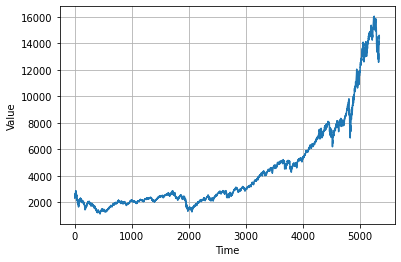

In [123]:
# plot the data
plot_series(time, series)